In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import requests
import html5lib
from selenium import webdriver
import re

In [4]:
aucRd2 = pd.read_csv('../Auction1001/data/unused/Auc1001_Rd2.csv')
aucRd3 = pd.read_csv('../Auction1001/data/unused/Auc1001_Rd3.csv')
aucRd4 = pd.read_csv('../Auction1001/data/unused/Auc1001_Rd4.csv')
print(aucRd2.shape[0], aucRd3.shape[0], aucRd4.shape[0])

4178 2100 3904


In [5]:
aucs2_4 = pd.concat([aucRd2, aucRd3, aucRd4], axis = 0)
aucs2_4.fillna(np.nan, inplace=True)

aucs24Station = aucs2_4.pivot_table(index = 'facility_id', aggfunc='mean')
aucs24Station.sort_values('bid_option_price', inplace=True, ascending=False)
aucs24Station.dropna(axis=0, inplace=True)
aucs24Station

/var/folders/0f/j4jr12k11rn02k94sy347xgm0000gn/T/ipykernel_32817/368376441.py:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  aucs24Station = aucs2_4.pivot_table(index = 'facility_id', aggfunc='mean')


,auction_id,benchmark_overprice,bid_option_price,frn,random_number,round,stage
facility_id,,,,,,,
60555,1001,56.287500,7.526001e+08,5414917,0.669258,2.0,2.333333
73356,1001,42.750000,6.995191e+08,3720042,0.188821,1.5,2.000000
38336,1001,39.049987,5.915420e+08,18265660,0.312903,3.0,2.000000
47535,1001,24.969265,4.421528e+08,19509470,0.545896,14.5,3.821429
74156,1001,24.969265,4.373133e+08,10622041,0.524008,14.5,3.821429
...,...,...,...,...,...,...,...
48659,1001,6.736134,6.574130e+05,18223693,0.211583,50.0,4.000000
68905,1001,9.000000,5.995325e+05,4318853,0.051084,50.0,2.000000
38584,1001,5.226891,5.081320e+05,19066166,0.667971,51.0,2.000000


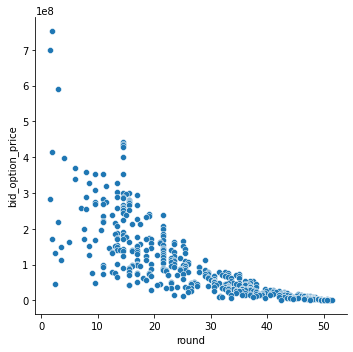

In [6]:
sns.relplot(data = aucs24Station, x = 'round', y='bid_option_price', kind='scatter')

In [8]:
stations = pd.read_csv('data/auc_stations.csv')
stations.head()

len(aucs2_4['bid_option_price'])
len(stations['off_air_opening_price'])

1030

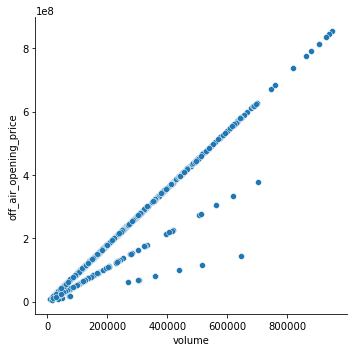

In [9]:
sns.relplot(data = stations, y= 'off_air_opening_price', x= 'volume')

In [10]:
costData = pd.read_html('https://meric.mo.gov/data/cost-living-data-series')[0]
'''colList = [d[0] for d in costData.columns]
dataList = np.array([pd.Series(d[1:]) for d in costData.columns])

pd.DataFrame(dataList, columns=colList)
dataList'''

costData.columns.to_frame(index=False)
costData.head()
costData.shape

(0, 9)

In [11]:
url = requests.get('https://auctiondata.fcc.gov/public/projects/1000/reports/reverse-bids')
page = url.text
query = re.findall('window.AwFormatting.units = (.*)', page)[0]